In [20]:
import pandas as pd

df = pd.read_csv('../data/aug-5-dataset/error_detection_dataset.csv')

In [21]:
temp = df[df['error_type'] == 'computational_error']

In [22]:
temp = temp.dropna(subset=['erroneous_line', 'erroneous_line_eqn'])

temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1854 entries, 2067 to 4066
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   1854 non-null   int64 
 1   tier                    1854 non-null   object
 2   question                1854 non-null   object
 3   correct_answer          1854 non-null   object
 4   wrong_answer            1854 non-null   object
 5   error_type              1854 non-null   object
 6   explanation             1854 non-null   object
 7   erroneous_line_number   1854 non-null   object
 8   erroneous_line          1854 non-null   object
 9   erroneous_line_eqn      1854 non-null   object
 10  correct_answer_mapping  1854 non-null   object
 11  wrong_answer_mapping    1854 non-null   object
 12  correct_eqn_mapping     1854 non-null   object
 13  wrong_eqn_mapping       1854 non-null   object
 14  correct_answer_length   1854 non-null   int64 
 15  wrong_

In [23]:
temp = temp[["index","tier","wrong_answer_mapping","wrong_eqn_mapping","split", "erroneous_line","erroneous_line_eqn","erroneous_line_number"]]

In [ ]:
import json
no_comp_lines = []
for i, row in temp.iterrows():
    soln_dict = json.loads(row['wrong_answer_mapping'])
    eqn_dict = json.loads(row['wrong_eqn_mapping'])
    for key, line in soln_dict.items():
        if key == "FA":
            break
        else:
            # check if the line contains no digits
            if 
                row["no_comp_line_number"] = key
                no_comp_lines.append(row)
                break

In [32]:
check = pd.DataFrame(no_comp_lines)

In [35]:
check

,index,tier,wrong_answer_mapping,wrong_eqn_mapping,split,erroneous_line,erroneous_line_eqn,erroneous_line_number,no_comp_line_number
2086,698,tier4,"{\n ""L1"": ""We calculate 50% of 16 GB:"",\n ""L2"": ""50/100 * 16 GB = 0.5 * 16 GB = 9 GB"",\n ""L3"": ""That leaves 16 GB - 9 GB = 7 GB available on this key."",\n ""FA"": ""7""\n}","{\n ""L1"": """",\n ""L2"": ""50/100*16=9"",\n ""L3"": ""16-9=7"",\n ""FA"": """"\n}",train,50/100 * 16 GB = 0.5 * 16 GB = 9 GB,50/100*16=9,L2,L1
2123,943,tier4,"{\n ""L1"": ""Every donut costs him $.2 because 2.4 divided by 12 equals .2"",\n ""L2"": ""So he makes $.8 for every donut he sells because $1 minus $.2 equals .8"",\n ""L3"": ""He needs to sell 120 donuts because 96 divided by .8 equals 132."",\n ""L4"": ""He needs to buy and sell 10 dozen donuts because 132 divided by 12 equals 11"",\n ""FA"": ""11""\n}","{\n ""L1"": ""2.4/12=.2"",\n ""L2"": """",\n ""L3"": ""96/.8=132"",\n ""L4"": ""132/12=11"",\n ""FA"": """"\n}",train,He needs to sell 120 donuts because 96 divided by .8 equals 132.,96/.8=132,L3,L2
2133,3873,tier4,"{\n ""L1"": ""Tiffany runs 2 blocks per minute because 6 / 3 = 2"",\n ""L2"": ""Moses runs 15 blocks per minute because 12 / 8 = 15"",\n ""L3"": ""The runner with the highest average speed is Tiffany because 2 > 15"",\n ""FA"": ""2""\n}","{\n ""L1"": ""6/3=2"",\n ""L2"": ""12/8=15"",\n ""L3"": """",\n ""FA"": """"\n}",train,Moses runs 15 blocks per minute because 12 / 8 = 15,12/8=15,L2,L3
2148,1636,tier4,"{\n ""L1"": ""He has 7-2=5 other classes"",\n ""L2"": ""7.5 hours - 1.5 hours = 6 hours"",\n ""L3"": ""6 hours = 630 minutes"",\n ""L4"": ""630/5 = 126 minutes"",\n ""L5"": ""Keegan spends 126 minutes in one of his other classes."",\n ""FA"": ""126""\n}","{\n ""L1"": ""7-2=5"",\n ""L2"": ""7.5-1.5=6"",\n ""L3"": ""6*60=630"",\n ""L4"": ""630/5=126"",\n ""L5"": """",\n ""FA"": """"\n}",train,6 hours = 630 minutes,6*60=630,L3,L5
2229,1636,tier4,"{\n ""L1"": ""He has 7-2=5 other classes"",\n ""L2"": ""7.5 hours - 1.5 hours = 6 hours"",\n ""L3"": ""6 hours = 360 minutes"",\n ""L4"": ""360/5 = 27 minutes"",\n ""L5"": ""Keegan spends 27 minutes in one of his other classes."",\n ""FA"": ""27""\n}","{\n ""L1"": ""7-2=5"",\n ""L2"": ""7.5-1.5=6"",\n ""L3"": ""6*60=360"",\n ""L4"": ""360/5=27"",\n ""L5"": """",\n ""FA"": """"\n}",train,360/5 = 27 minutes,360/5=27,L4,L5
2299,3412,tier4,"{\n ""L1"": ""He has enough milk for 20 glasses of chocolate milk because 130 / 6.5 = 20"",\n ""L2"": ""He has enough syrup for 40 glasses of chocolate milk because 60 / 1.5 = 40"",\n ""L3"": ""He can make 20 glasses of chocolate milk because 20 < 40"",\n ""L4"": ""He will drink 106 ounces of chocolate milk because 20 x 8 = 106"",\n ""FA"": ""106""\n}","{\n ""L1"": ""130/6.5=20"",\n ""L2"": ""60/1.5=40"",\n ""L3"": """",\n ""L4"": ""20*8=106"",\n ""FA"": """"\n}",train,He will drink 106 ounces of chocolate milk because 20 x 8 = 106,20*8=106,L4,L3
2358,1757,tier4,"{\n ""L1"": ""He read 400 pages from the 500 page book because 500 x 0.8 = 400"",\n ""L2"": ""He read 200 pages from the 1000 page book because 1000 x (1/5) = 200"",\n ""L3"": ""He has read 600 pages in total."",\n ""L4"": ""He needs to read 2000 more pages to reach 800 pages because 800 - 600 = 2000"",\n ""FA"": ""2000""\n}","{\n ""L1"": ""500*0.8=400"",\n ""L2"": ""1000*(1/5)=200"",\n ""L3"": """",\n ""L4"": ""800-600=2000"",\n ""FA"": """"\n}",train,He needs to read 2000 more pages to reach 800 pages because 800 - 600 = 2000,800-600=2000,L4,L3
2377,5878,tier4,"{\n ""L1"": ""The pebble's total splash width is 24/1 meters because 6 times 1/4 equals 24/1."",\n ""L2"": ""The rock's total splash width is 3/2 meters because 3 times 1/2 equals 3/2."",\n ""L3"": ""The boulder's total splash width is 4 because 2 times 2 equals 4."",\n ""L4"": ""The total splash width for all the rocks is 59/2 because 24/1 plus 3/2 plus 4 equals 59/2."",\n ""FA"": ""59/2""\n}","{\n ""L1"": ""6*1/4=24/1"",\n ""L2"": ""3*1/2=3/2"",\n ""L3"": """",\n ""L4"": """",\n ""F

In [33]:
check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2086 to 4012
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  33 non-null     int64 
 1   tier                   33 non-null     object
 2   wrong_answer_mapping   33 non-null     object
 3   wrong_eqn_mapping      33 non-null     object
 4   split                  33 non-null     object
 5   erroneous_line         33 non-null     object
 6   erroneous_line_eqn     33 non-null     object
 7   erroneous_line_number  33 non-null     object
 8   no_comp_line_number    33 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.6+ KB


In [11]:
# Set max column width to None (no truncation)
pd.set_option('display.max_colwidth', None)

# Optionally, set display width to wrap columns (for wide DataFrames)
pd.set_option('display.width', 0)

In [12]:
#check if "erroneous_line" and "erroneous_line_eq" have any missing values
# print all rows that are missing "erroneous_line" or "erroneous_line_eqn"

missing = temp[temp['erroneous_line_eqn'].isnull()]

missing[["erroneous_line_number","erroneous_line","erroneous_line_eqn"]]

,erroneous_line_number,erroneous_line,erroneous_line_eqn
2070,L7,"In total, to buy eight personal planners and four spiral notebooks, you'd have to pay $64+$48 = $121",NaN
2074,L5,That means he paid 90-18=$90-18=69>>69,NaN
2076,L4,Then divide the number of bobby pins by the total number of decorations and multiply by 100% to express the answer as a percentage: 3 bobby pins / 21 decorations * 100% = 14.29 which rounds down to 41%,NaN
2095,L3,There are 15 cups of lemonade in the pitcher because 12 x 1 and 1/4 = 16,NaN
2099,L2,"This means that for each pack of 500 mL milk, you can save $1.3 - $1.25 = $0.01.",NaN
...,...,...,...
3923,L1,"If the first car was made 10 years earlier than the second car, then the manufacture date for the second car is 1970+10 = 1890",NaN
3931,L2,"The riding lawnmower has 4 wheels, bringing the total up to 8+4=21 wheels.",NaN
3968,L1,"If the number of views on the first day was 4000, the video's views on Youtube increased by 10*4000= 400000 after four days.",NaN
3970,L1,First find the total number of blueberries needed for one pie: 200 blueberries/pint * 2 pints/pie = 40 blueberries/pie,NaN


In [7]:
missing_erroneous_line

False

In [8]:
missing_erroneous_line_eq

True

In [ ]:
df_comp = df[df['error_type'] == 'computational_error']

for idx, row in df_comp.iterrows():
    

In [7]:
import re
import math
import json

def rigorous_compare_equation_dicts(predicted_dict: dict, expected_dict: dict) -> float:
    """
    Compares two equation dictionaries with robust preprocessing and flexible checks.
    - Sanitizes strings by removing whitespace, standardizing multiplication, and stripping non-math characters.
    - Rounds all numbers to 2 decimal places before comparison.
    """

    def _safe_eval(expression: str):
        """Safely evaluates a string, returning a sentinel on error."""
        try:
            return eval(expression, {"__builtins__": None}, {})
        except Exception:
            return object()

    def _extract_components(expression: str) -> tuple[list, list]:
        """Extracts number and operator sequences, with rounding."""
        # Regex to find numbers (integers or floats)
        number_strings = re.findall(r'\d+\.?\d*|\.\d+', expression)
        
        # iv. Round all extracted numbers to 2 decimal places
        numbers = [round(float(n), 2) for n in number_strings]
        
        # Regex to find basic arithmetic operators
        operators = re.findall(r'[+\-*/]', expression)
        return numbers, operators

    def _expressions_are_equivalent(pred_expr: str, exp_expr: str) -> bool:
        """Checks if two expression strings are equivalent after sanitization and rounding."""
        # 1. Compare evaluated values
        pred_val = _safe_eval(pred_expr)
        exp_val = _safe_eval(exp_expr)

        if not (isinstance(pred_val, (int, float)) and isinstance(exp_val, (int, float))):
            return False
            
        # Use math.isclose for robust floating point comparison
        if not math.isclose(pred_val, exp_val, rel_tol=1e-5):
            return False

        # 2 & 3. Compare sequence of numbers (rounded) and operators
        pred_nums, pred_ops = _extract_components(pred_expr)
        exp_nums, exp_ops = _extract_components(exp_expr)

        if pred_nums != exp_nums or pred_ops != exp_ops:
            return False

        return True

    # --- Main function logic ---
    items_to_score = [(k, v) for k, v in expected_dict.items() if v]
    if not items_to_score:
        return 1.0 if not any(v for v in predicted_dict.values()) else 0.0

    scores = []
    for key, expected_eqn in items_to_score:
        line_score = 0
        predicted_eqn = predicted_dict.get(key, "")
        
        # Check if both are valid equations
        if predicted_eqn.count('=') == 1 and expected_eqn.count('=') == 1:
            pred_lhs, pred_rhs = predicted_eqn.split('=', 1)
            exp_lhs, exp_rhs = expected_eqn.split('=', 1)

            if _expressions_are_equivalent(pred_lhs, exp_lhs) and \
               _expressions_are_equivalent(pred_rhs, exp_rhs):
                line_score = 1
        
        scores.append(line_score)

    return sum(scores) / len(scores) if scores else 1.0

In [2]:
import pandas as pd

df = pd.read_csv('../data/equation_extraction_gemma3-1b-unsloth_20250807_1859_results/final_results/final_evaluation_results.csv')

In [3]:
df.columns

Index(['problem_index', 'rigorous_score', 'expected_json', 'predicted_json',
       'full_prediction_text'],
      dtype='object')

Sanitizing predicted and expected equation dictionaries...
Calculating new scores with the updated logic...

Displaying samples where the score improved with the new evaluation logic:
     problem_index  rigorous_score  \
12            6237        0.285714   
123           6477        0.400000   
92            6382        0.571429   
124           3501        0.666667   
77            4309        0.800000   

                                         expected_json  \
12   {"L1": "2*8=16", "L2": "16+12=28", "L3": "6*28...   
123  {"L1": "1000-300-40=660", "L2": "5-2=3", "L3":...   
92   {"L1": "16+12=28", "L2": "28/2=14", "L3": "28+...   
124  {"L1": "2*9=18", "L2": "24-18=6", "L3": "6/1.5...   
77   {"L1": "2000*20=40000", "L2": "40000/800=50", ...   

                                        predicted_json  \
12   {"L1": "2*8=16", "L2": "16+12=28", "L3": "6/ho...   
123  {"L1": "1000-300-40=660", "L2": "5-2=3", "L3":...   
92   {"L1": "16+12=28", "L2": "28/2=14", "L3": "28+...   
124  {

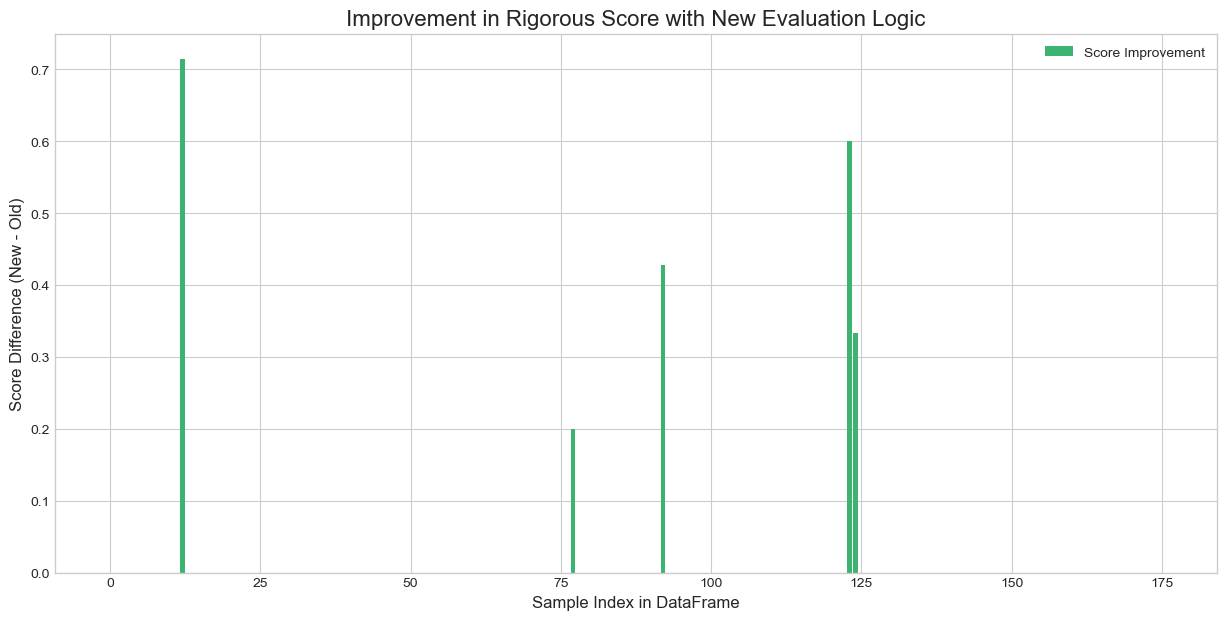

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

# --- Helper function for sanitization ---

def _sanitize_equation_string(expression: str) -> str:
    """Cleans a single equation string."""
    if not isinstance(expression, str):
        return ""
    sanitized = expression.replace(' ', '')
    sanitized = sanitized.replace('x', '*').replace('×', '*')
    sanitized = re.sub(r'/([a-zA-Z]+)', '', sanitized)
    sanitized = re.sub(r'[^\d.()+\-*/=]', '', sanitized)
    return sanitized

def sanitize_dict_column(json_str: str) -> dict:
    """Takes a JSON string, sanitizes the equations within it, and returns a dictionary."""
    try:
        data_dict = json.loads(json_str)
        sanitized_dict = {key: _sanitize_equation_string(value) for key, value in data_dict.items()}
        return sanitized_dict
    except (json.JSONDecodeError, TypeError):
        return {}

# --- Step 1: Update the dict columns to have sanitized equations ---

print("Sanitizing predicted and expected equation dictionaries...")
df['sanitized_predicted_json'] = df['predicted_json'].apply(sanitize_dict_column)
df['sanitized_expected_json'] = df['expected_json'].apply(sanitize_dict_column)


# --- Step 2: Apply the new comparison function to create a new scores column ---

def calculate_new_score(row):
    """Applies the comparison function to the sanitized dictionary columns."""
    return rigorous_compare_equation_dicts(
        predicted_dict=row['sanitized_predicted_json'],
        expected_dict=row['sanitized_expected_json']
    )

print("Calculating new scores with the updated logic...")
df['new_rigorous_score'] = df.apply(calculate_new_score, axis=1)


# --- Step 3: Compute the differences and plot ---

df['score_difference'] = df['new_rigorous_score'] - df['rigorous_score']

print("\nDisplaying samples where the score improved with the new evaluation logic:")
# Show the most impactful changes first
print(df[df['score_difference'] > 0].sort_values(by='score_difference', ascending=False).head(10))


# Plotting
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 7))

# Create a bar plot
ax.bar(df.index, df['score_difference'], color='mediumseagreen', label='Score Improvement')

# Set titles and labels
ax.set_title('Improvement in Rigorous Score with New Evaluation Logic', fontsize=16)
ax.set_xlabel('Sample Index in DataFrame', fontsize=12)
ax.set_ylabel('Score Difference (New - Old)', fontsize=12)
ax.legend()
ax.set_ylim(bottom=0)

plt.show()

In [9]:
df['score_difference'].describe()

count    176.000000
mean       0.012933
std        0.081960
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.714286
Name: score_difference, dtype: float64

In [10]:
df['new_rigorous_score'].mean()

0.9440002705627706

In [11]:
df.to_csv('../data/equation_extraction_gemma3-1b-unsloth_20250807_1859_results/final_results/final_evaluation_results_with_new_scores.csv', index=False)

In [15]:
temp = df[df['score_difference'] > 0].to_dict(orient='records')
temp

[{'problem_index': 6237,
  'rigorous_score': 0.2857142857142857,
  'expected_json': '{"L1": "2*8=16", "L2": "16+12=28", "L3": "6*28=618", "L4": "12*28=336", "L5": "336/3=112", "L6": "618+112=730", "L7": "730*0.2=146", "FA": ""}',
  'predicted_json': '{"L1": "2*8=16", "L2": "16+12=28", "L3": "6/hour*28=618/week", "L4": "12/hour*28/week=336/week", "L5": "336/3=112/week", "L6": "618+112=730/week", "L7": "730*0.2=146/week", "FA": ""}',
  'full_prediction_text': '{\n  "L1": "2*8=16",\n  "L2": "16+12=28",\n  "L3": "6/hour*28=618/week",\n  "L4": "12/hour*28/week=336/week",\n  "L5": "336/3=112/week",\n  "L6": "618+112=730/week",\n  "L7": "730*0.2=146/week",\n  "FA": ""\n}',
  'sanitized_predicted_json': {'L1': '2*8=16',
   'L2': '16+12=28',
   'L3': '6*28=618',
   'L4': '12*28=336',
   'L5': '336/3=112',
   'L6': '618+112=730',
   'L7': '730*0.2=146',
   'FA': ''},
  'sanitized_expected_json': {'L1': '2*8=16',
   'L2': '16+12=28',
   'L3': '6*28=618',
   'L4': '12*28=336',
   'L5': '336/3=112'